<a href="https://colab.research.google.com/github/tylaar1/PICAR-autopilot/blob/main/PICAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import os
import seaborn as sns
import random
import pandas as pd

In [14]:
import os
training_image_folder = '/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/training_data/training_data' #train file path
training_image_files = [os.path.join(training_image_folder, f) for f in os.listdir(training_image_folder)]
test_image_folder = '/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/test_data'#test file path
test_image_files = [os.path.join(test_image_folder, f) for f in os.listdir(test_image_folder)]
test_image_files

['/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/test_data/test_data']

In [45]:
#print(os.listdir(training_image_folder))

In [38]:
training_image_folder = '/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/training_data'
test_image_folder = '/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/test_data'
labels_file = '/content/gdrive/MyDrive/machine-learning-in-science-ii-2025/training_norm.csv'

#load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_image_folder,
    image_size=(224, 224),
    batch_size=32,
    shuffle = False

)

#load test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_folder,
    image_size=(224, 224),
    batch_size=32,
    shuffle = False

)
#load image labels
labels = pd.read_csv(labels_file)
labels.head()


Found 13798 files belonging to 1 classes.
Found 1020 files belonging to 1 classes.


,image_id,angle,speed
0,1,0.4375,0.0
1,2,0.8125,1.0
2,3,0.4375,1.0
3,4,0.6250,1.0
4,5,0.5000,0.0


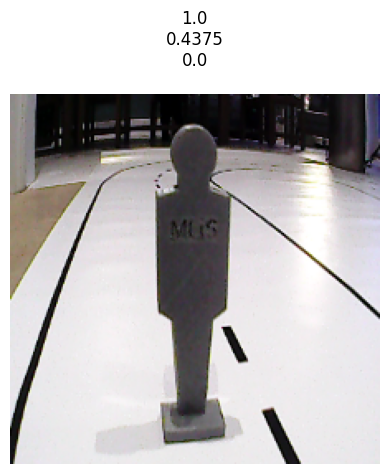

In [44]:
for images in train_dataset.take(1):

    first_batch = images[0]
    first_image = first_batch[0]

first_label = labels.iloc[0]
first_label_csv = first_label.to_csv(header=False, index=False)

plt.imshow(first_image.numpy().astype("uint8"))
plt.title(first_label_csv)
plt.axis("off")
plt.show()

In [44]:
'''next steps: Find way of joining image to label using images png number and labels image id
Then can hopefully modify mobilenet to predict other two values (angle and speed) in the label'''



